In [117]:
#import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **Load the dataset**

In [172]:
df = pd.read_csv('/content/bengali_ hate_v1.0.csv',sep='\t')

# **View first five rows**

In [173]:
df.head()

,text,label
0,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...,Geopolitical
1,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে,Geopolitical
2,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...,Religious
3,আমরা বলতে কারা ভারত তাইতো,Geopolitical
4,পাকিস্তান আমার বাল,Geopolitical


# ***Number of available categories ***

In [119]:
df['label'].value_counts()

Geopolitical      1379
Personal           629
Political          592
Religious          502
Gender abusive     316
Name: label, dtype: int64

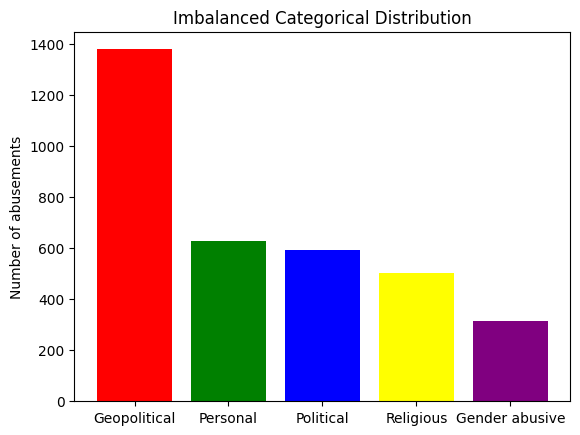

In [174]:
#visualize

plt.bar(df['label'].value_counts().index,df['label'].value_counts().values,color=['r','g','b','yellow','purple'])
plt.ylabel('Number of abusements')
plt.title('Imbalanced Categorical Distribution')
plt.show()

# **Convert categorical label into numeric**

In [179]:
#use label encoding

from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df['label'] = lbl.fit_transform(df['label'])

In [180]:
#show first five rows

df.head()

,text,label
0,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...,1
1,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে,1
2,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...,4
3,আমরা বলতে কারা ভারত তাইতো,1
4,পাকিস্তান আমার বাল,1


In [181]:
#dimension of the data
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows: 3418
Number of columns: 2


In [182]:
df['label'].value_counts()

1    1379
2     629
3     592
4     502
0     316
Name: label, dtype: int64

# **Import sklearn and keras related modules**

In [125]:
Afrom sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,GRU,Embedding,Flatten,Dropout
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras import Sequential
import numpy as np
from tensorflow.keras import regularizers

In [156]:
#Split the feature and target

X = df[['text']]
y = df['label']

# **Using random over sampling Technique**

In [157]:
from imblearn.over_sampling import RandomOverSampler

# Create an instance of the RandomOverSampler class
ros = RandomOverSampler()

# Resample the data
X_resampled, y_resampled = ros.fit_resample(X, y)  # X_resampled and y_resampled are the resampled data arrays


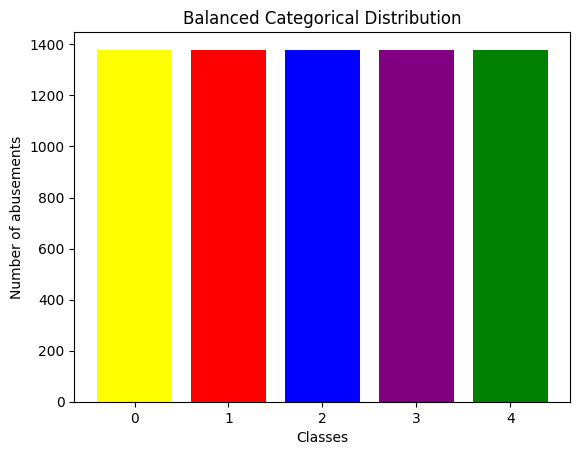

In [185]:
#Balanced distribution

plt.bar(y_resampled.value_counts().index,y_resampled.value_counts().values,color=['r','g','b','yellow','purple'])
plt.ylabel('Number of abusements')
plt.xlabel('Classes')
plt.title('Balanced Categorical Distribution')
plt.show()

# **Text preprocessing**

In [158]:
#tokenized the text into vector

tk = Tokenizer()
tk.fit_on_texts(X_resampled['text'])
seq = tk.texts_to_sequences(X_resampled['text'])
vec_x = pad_sequences(seq,padding='post',maxlen=50)

# **Convert into array**

In [159]:
x_arr = np.array(vec_x)
y_arr = np.array(y_resampled)

# **split the data into train and test set**

In [160]:
X_train,X_test,y_train,y_test = train_test_split(x_arr,y_arr,test_size=0.10,random_state=0)

# **Create model using BiLSTM**

In [162]:
model = Sequential()
model.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=80,input_length=50))
model.add(Bidirectional(LSTM(units=100,return_sequences=True)))
model.add(Bidirectional(LSTM(units=150)))
model.add(Flatten())
model.add(Dense(units=5,activation='softmax',kernel_regularizer=regularizers.l2(0.01)))

In [163]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) # using adam optimizer with categorical loss function

In [164]:
#fit the data into the model
history = model.fit(X_train,y_train,epochs=6,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/6
194/194 [==============================] - 88s 402ms/step - loss: 1.0781 - accuracy: 0.5747 - val_loss: 0.5796 - val_accuracy: 0.8449
Epoch 2/6
194/194 [==============================] - 74s 382ms/step - loss: 0.3454 - accuracy: 0.9046 - val_loss: 0.4148 - val_accuracy: 0.8957
Epoch 3/6
194/194 [==============================] - 75s 388ms/step - loss: 0.1996 - accuracy: 0.9513 - val_loss: 0.3509 - val_accuracy: 0.9174
Epoch 4/6
194/194 [==============================] - 75s 385ms/step - loss: 0.1664 - accuracy: 0.9542 - val_loss: 0.4012 - val_accuracy: 0.9029
Epoch 5/6
194/194 [==============================] - 74s 383ms/step - loss: 0.1488 - accuracy: 0.9587 - val_loss: 0.3850 - val_accuracy: 0.9087
Epoch 6/6
194/194 [==============================] - 75s 388ms/step - loss: 0.1246 - accuracy: 0.9642 - val_loss: 0.4141 - val_accuracy: 0.9072


In [165]:
#Evaluate the model

model.evaluate(X_test,y_test)

22/22 [==============================] - 2s 86ms/step - loss: 0.4141 - accuracy: 0.9072


[0.4140547513961792, 0.9072463512420654]

# Got 90 % accuracy

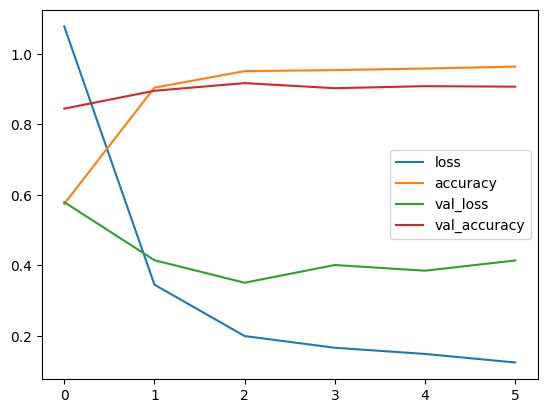

In [166]:
#graphical loss measurement

pd.DataFrame(history.history).plot()
plt.show()

# **Performance of the model**

In [167]:
y_pred = model.predict(X_test)
y_pred_pro = (y_pred>0.5).astype(int)
y_pred =  np.argmax(y_pred_pro, axis=1)

22/22 [==============================] - 7s 153ms/step


In [168]:
y_pred

array([4, 0, 1, 2, 3, 4, 2, 2, 3, 2, 3, 1, 2, 4, 2, 3, 3, 4, 1, 1, 4, 0,
       2, 2, 0, 3, 1, 0, 1, 0, 0, 0, 3, 4, 0, 4, 0, 3, 1, 0, 1, 3, 4, 2,
       4, 1, 4, 2, 0, 4, 3, 2, 0, 4, 3, 4, 2, 4, 2, 1, 3, 0, 2, 4, 0, 0,
       1, 1, 0, 3, 4, 0, 4, 4, 0, 3, 1, 3, 2, 4, 4, 4, 2, 2, 4, 2, 2, 1,
       1, 1, 2, 0, 4, 0, 4, 2, 3, 4, 1, 1, 0, 1, 3, 4, 2, 3, 2, 4, 1, 3,
       1, 1, 3, 0, 3, 2, 1, 0, 2, 2, 3, 1, 1, 2, 1, 3, 0, 3, 3, 3, 3, 0,
       1, 3, 4, 4, 4, 4, 4, 2, 3, 1, 3, 4, 2, 3, 4, 2, 0, 4, 2, 2, 3, 0,
       2, 3, 1, 4, 4, 1, 0, 4, 1, 2, 4, 0, 2, 0, 3, 0, 3, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 1, 3, 0, 2, 1, 3, 1, 4, 1, 2, 4, 0, 2, 2, 3, 4, 2,
       3, 3, 0, 2, 2, 1, 1, 1, 4, 4, 0, 0, 4, 1, 3, 1, 1, 3, 1, 3, 4, 0,
       0, 1, 4, 4, 2, 2, 4, 0, 3, 3, 4, 3, 0, 2, 1, 2, 3, 0, 3, 2, 1, 3,
       2, 0, 0, 0, 1, 0, 1, 3, 1, 0, 3, 4, 4, 2, 2, 4, 3, 4, 3, 2, 4, 2,
       2, 2, 3, 2, 2, 0, 0, 2, 3, 4, 2, 2, 1, 0, 1, 2, 3, 0, 2, 3, 2, 3,
       2, 3, 1, 2, 2, 4, 4, 0, 4, 4, 0, 4, 1, 0, 3,

# **metrics **

In [169]:
#confusion matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cnf = confusion_matrix(y_test,y_pred)

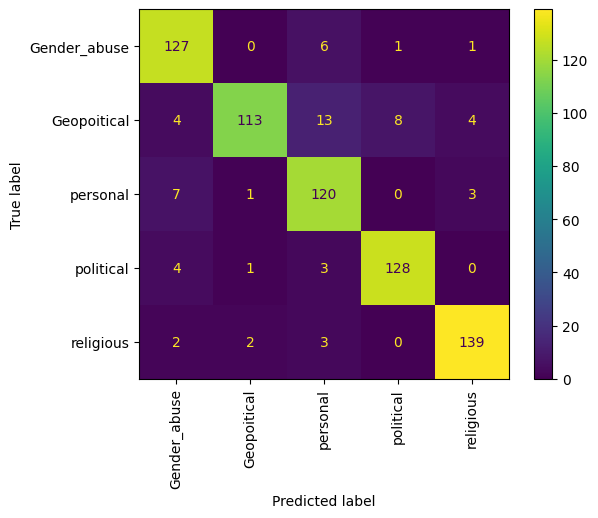

In [187]:
#plot the confusion matrix

ax = ConfusionMatrixDisplay(cnf,display_labels=['Gender_abuse','Geopoitical','personal','political','religious']).plot()
plt.xticks(rotation=90)
plt.show()